In [1]:
import random
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_analysis_common_utils import summarize_sentences, load_filelist_as_df, phonemize_series
from src.text.cleaners import remove_stress_marks

plt.style.use("default")
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [2]:
train_df = load_filelist_as_df("../files/studio_stress_train.txt")
test_df = load_filelist_as_df("../files/studio_stress_test.txt")

train_df["sentence"] = train_df["sentence"].str.strip().apply(remove_stress_marks)
test_df["sentence"] = test_df["sentence"].str.strip().apply(remove_stress_marks)

train_df["sentence"] = phonemize_series(train_df["sentence"])
test_df["sentence"] = phonemize_series(test_df["sentence"])

                                 filepath  \
0  files/studio_clips/07-SKYRIUS_0579.wav   
1  files/studio_clips/01-SKYRIUS_0150.wav   
2  files/studio_clips/02-SKYRIUS_0118.wav   
3  files/studio_clips/01-SKYRIUS_0013.wav   
4  files/studio_clips/01-SKYRIUS_0094.wav   

                                            sentence  
0          kaip jɪs ɡaɭi uʃpʲiɭdʲiːtʲi ɡiːvʲenʲɪmaː?  
1             oː apɭink ʒaɭʲuoja ʒiːdʲɪnʲtʲi pʲieva.  
2                    ɭinʲktʲeɭʲʊ ɡal̩va, ir atsakau:  
3  bʲet svarbʲeuʂe ɡavoːmʲe ir poː dvʲiɡubaː davʲ...  
4  mʲes buvoːmʲe nuʂitʲeɪkʲeɑ karʲɪnɡai, ir tʲikr...  


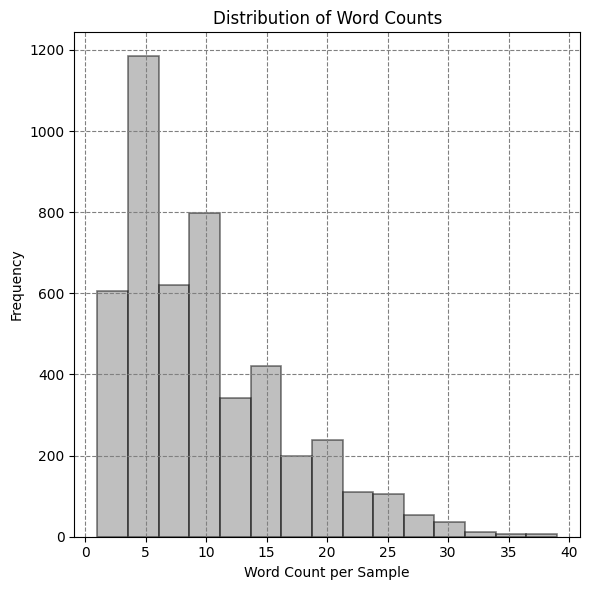


    Word statistics (Per Text):
        Total:       47209
        Unique:      12064
        Mean:         9.96
        STD:          6.55
        Median:       8.00
        Min:             1
        Max:            39
    


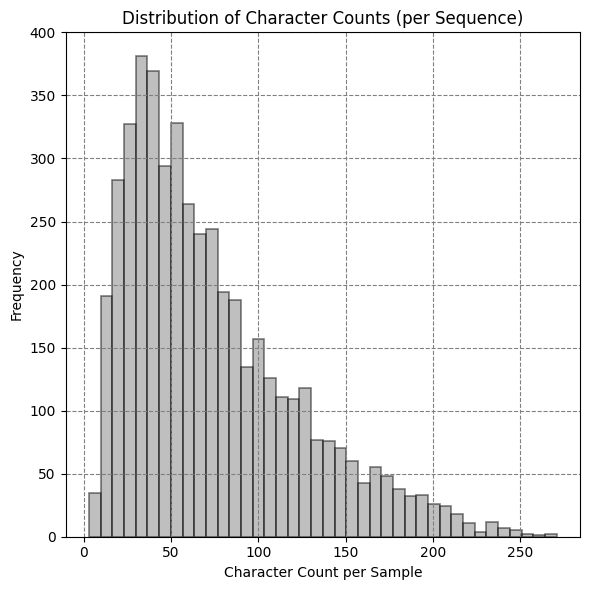


    Character statistics (Per Text):
        Total:      347726
        Mean:        73.39
        STD:         48.80
        Median:      61.00
        Min:             3
        Max:           271
    


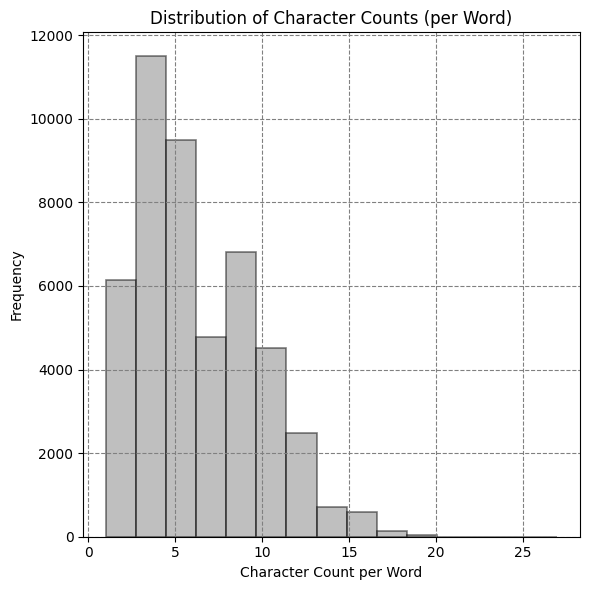


    Character statistics (Per Word):
        Total:      294862
        Mean:         6.25
        STD:          3.42
        Median:       6.00
        Min:             1
        Max:            27
    


In [3]:
# TRAINING SET
print(train_df.head())
summarize_sentences(train_df)

                                 filepath  \
0  files/studio_clips/06-SKYRIUS_0466.wav   
1  files/studio_clips/11-SKYRIUS_0180.wav   
2  files/studio_clips/10-SKYRIUS_0470.wav   
3  files/studio_clips/04-SKYRIUS_0437.wav   
4  files/studio_clips/09-SKYRIUS_0308.wav   

                                            sentence  
0  koːdʲeel̩ taip vʲɪʂi ɡaudoː tuos varʲɪnʲʲus ʒi...  
1  uʃpakaɭiː eejeɑs ɭiepsnoːsvaidʲinʲɪnkas suʒeɪs...  
2    kas turʲi ɭeidʲɪmaː, ɡaɭi darʲiːtʲi kaː noːrʲi.  
3                            joː akʲiːs paɡiːvʲeeja.  
4                              vʲiena poː kʲɪtoːs...  


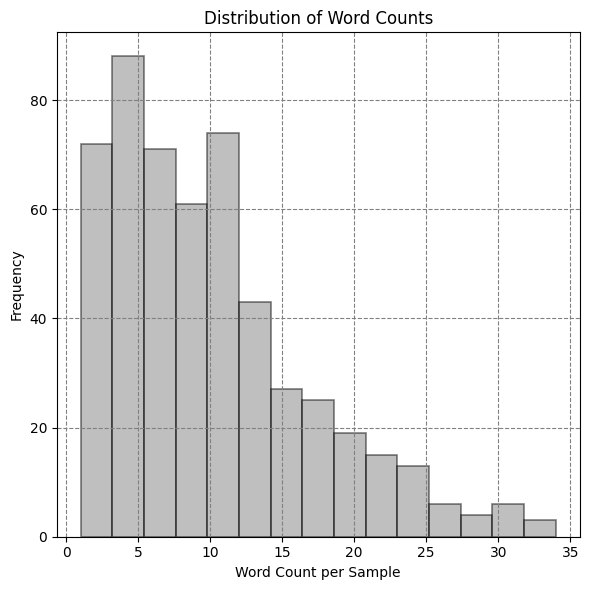


    Word statistics (Per Text):
        Total:        5284
        Unique:       2556
        Mean:        10.03
        STD:          6.73
        Median:       9.00
        Min:             1
        Max:            34
    


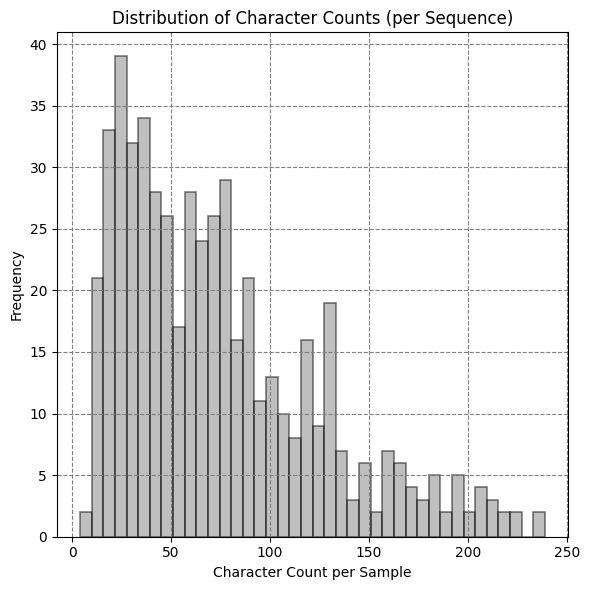


    Character statistics (Per Text):
        Total:       39217
        Mean:        74.42
        STD:         50.28
        Median:      63.00
        Min:             4
        Max:           239
    


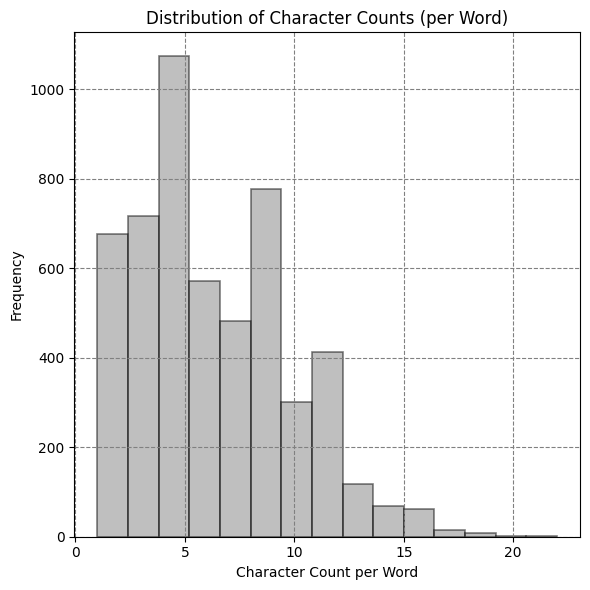


    Character statistics (Per Word):
        Total:       33275
        Mean:         6.30
        STD:          3.43
        Median:       6.00
        Min:             1
        Max:            22
    


In [4]:
# TESTING SET
print(test_df.head())
summarize_sentences(test_df)

In [5]:
def save_filelist(_df: pd.DataFrame, out_path: str):
    _df.to_csv(
        out_path,
        sep="|",
        index=False,
        header=False,
        columns=["filepath", "sentence"]
    )
    print(f"Saved filelist to {out_path}")


save_filelist(train_df, "../files/studio_phoneme_train.txt")
save_filelist(test_df, "../files/studio_phoneme_test.txt")

Saved filelist to ../files/studio_phoneme_train.txt
Saved filelist to ../files/studio_phoneme_test.txt
